In [ ]:
bfrom sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importamos dataset

In [ ]:
plt.style.use('ggplot')

iris = datasets.load_iris()

type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target.shape

(150,)

# Analisis exploratorio de los datos

In [ ]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Scatter matrix

Vamos a adicionar un nivel de analisis para ver la interaccion de las variables visualmente.

Introducimos la funcion de pandas Scatter Matrix y luego la de seaborn Pairplot, las dos funcionan de manera muy similar y nos permiten tener una idea sobre que atributo nos puede llegar a ser de importancia.

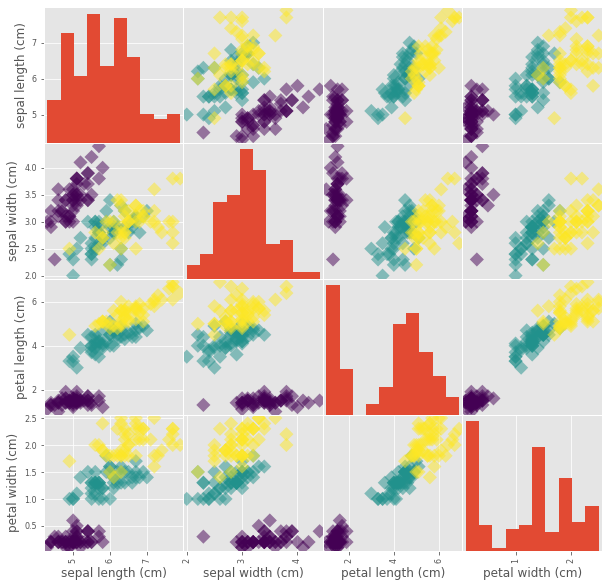

In [ ]:
_ = pd.plotting.scatter_matrix(df, 
                               c = y, 
                               figsize = [10, 10],
                               s = 100,
                               marker = 'D')

Vamos a hacer lo mismo ahora pero con la libreria de Seaborn

Para esto, primero necesitamos tener todo en un mismo DF, para eso utilizaremos la funcion de NumPy column_stack que nos permite justamente "agregarle una columna" a cada array.

In [ ]:
c = np.column_stack((X, y))

In [ ]:
c.shape

(150, 5)

In [ ]:
columnas = iris.feature_names + ['Type']

In [ ]:
df_completo = pd.DataFrame(data = c, columns = columnas)

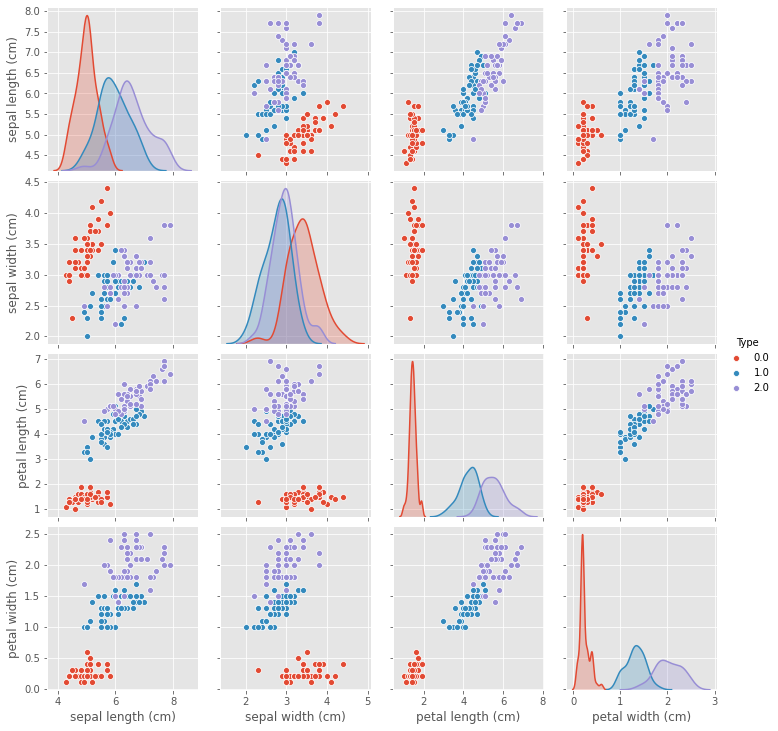

In [ ]:
sns.pairplot(df_completo, hue = 'Type')

Interesantes relaciones hemos visto de manera visual, ahora veamos como definir los modelos que nos van a permitir arrojar una prediccion sobre el tipo de especie.

Revisemos 2 conclusiones importantes que podamos sacar en funcion de los datos obtenidos.

# KNN

## Modelo y predicciones

In [ ]:
# Primero importamos la libreria de sklearn

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Una vez creado el modelo vamos a predecir que variedades serian los siguientes dos ejemplos.

In [ ]:
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [7.6, 3.2, 6.1, 2.1]])

In [ ]:
X_new.shape

(2, 4)

In [ ]:
prediction = knn.predict(X_new)

In [ ]:
print('Para los dos ejemplos ingresados las variedades son: {}'.format(prediction))

Para los dos ejemplos ingresados las variedades son: [0 2]


In [ ]:
transformacion = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [ ]:
list(map(transformacion.get, prediction))

['Setosa', 'Virginica']

## Grafico de decision KNN

Para hacer este grafico solo seleccionaremos 2 atributos, en este caso Petal width y Petal Lenght.

In [ ]:
from matplotlib.colors import ListedColormap

X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

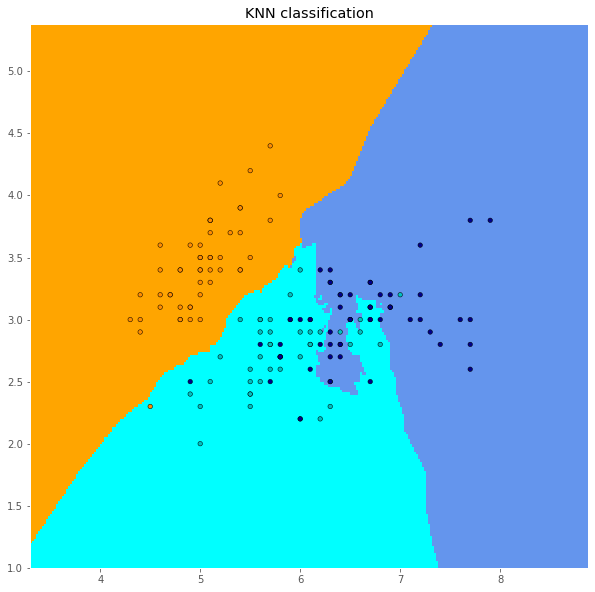

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            cmap=cmap_bold,
            edgecolor='k', 
            s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN classification")


plt.show()

## Train/Test Spit

Vamos a necesitar separar nuestros datos en un conjunto para entrenar al modelo y otro para probarlo, esto nos va a servir para poder verificar la performance de nuestro modelo con datos que no conoce.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size = 0.25, 
                                                    random_state = 15,
                                                    stratify= iris.target)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Las predicciones del test set son: \n {} '.format(y_pred))

Las predicciones del test set son: 
 [0 2 2 0 1 0 2 1 0 1 1 2 0 2 0 1 2 1 1 0 0 0 2 2 0 2 2 1 0 2 2 1 0 1 1 0 2
 1] 


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

Vamos a ver un poco graficamente el efecto del hiperparametro n_neighbors y como se relaciona con el concepto de Overfitting.

In [ ]:
scores = {'n_neighbors': [], 'Training accuracy': [], 'Test accuracy': []}

for i in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  scores['n_neighbors'].append(i)
  scores['Training accuracy'].append(knn.score(X_train, y_train))
  scores['Test accuracy'].append(knn.score(X_test, y_test))

scores = pd.DataFrame(scores)

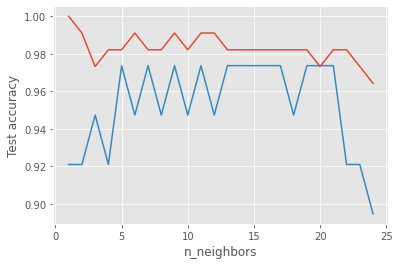

In [ ]:
# Vamos a graficar las dos rectas encontradas

sns.lineplot(x = 'n_neighbors', 
             y = 'Training accuracy', 
             data = scores)

sns.lineplot(x = 'n_neighbors', 
             y = 'Test accuracy', 
             data = scores)

# Regresión Logística

Para trabajar con regresión logística, vamos a utilizar de la libreria de Sklearn del apartado de modelos lineales, la clase LogisticRegression. Para importarla simplemente la llamamos de la siguiente manera:

    from sklearn.linear_model import LogisticRegression

A continuación veremos como inicializar una instancia de dicha clase, como entrenar nuestro modelo y predecir nuevos valores.

Los Hiperparametros que vamos a estudiar de este modelo son:

- C: relacionado a la magnitud de regularización aplicada al modelo.
- penalty: que tipo de regularización sera utilizada, por defecto l2.

A tener en cuenta:

Al ser un modelo lineal, el resultado van a ser coeficientes que multiplican a los atributos y una ordenada al origen, pero como determinamos que clase es la correspondiente?

Por el signo, si es postivo predice una clase, si es negativo la otra clase.

Esto último nos trae un problema con el ejemplo actual, ya que la predicción final tiene 3 clases diferenes, una para cada tipo de flor. De todas formas, no es algo que no podamos resolver, y para ello hay dos enfoques:

- One vs rest: igualamos "y" a una clase, el resultado sera un booleano (1 o 0), de esta forma tendremos un modelo de regresion logistica para cada clase.
- Multinomial: agregamos dos parametros al modelo, multi_class="multinomial" y solver='lbfgs' y utilizamos un solo clasificador para predecir todas las clases.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# volvemos a separar el dataset en test y prueba

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size = 0.25, 
                                                    random_state = 15,
                                                    stratify= iris.target)

## Hyperparameter C

In [ ]:
# creamos una instancia de la clase con un C=0.01
# asignamos los parametros correspondientes para hacerla multiclase

lr_strong_reg = LogisticRegression(C=0.01, multi_class='multinomial', solver='lbfgs')

lr_strong_reg.fit(X_train, y_train)

# creamos una instancia de la clase con un C=100
# asignamos los parametros correspondientes para hacerla multiclase

lr_weak_reg = LogisticRegression(C=100, multi_class='multinomial', solver='lbfgs')

lr_weak_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Regularización fuerte: \n')
print('El accuracy de prueba es de: {}'.format(lr_strong_reg.score(X_train, y_train)))
print('El accuracy de test es de: {}'.format(lr_strong_reg.score(X_test, y_test)))

Regularización fuerte: 

El accuracy de prueba es de: 0.8482142857142857
El accuracy de test es de: 0.8947368421052632


In [ ]:
print('Regularización debil: \n')
print('El accuracy de prueba es de: {}'.format(lr_weak_reg.score(X_train, y_train)))
print('El accuracy de test es de: {}'.format(lr_weak_reg.score(X_test, y_test)))

Regularización debil: 

El accuracy de prueba es de: 0.9910714285714286
El accuracy de test es de: 0.9473684210526315


## Dataset Churn

A fines prácticos y para poder ver puntualmente algunos temas, introduciremos un nuevo dataset, en el cual la clasificacion es binomial.

In [ ]:
churn = pd.read_csv('/content/drive/My Drive/4- Data Science/Clases UBA/KNN | Regresion Logistica | CV/Churn_Modelling.csv')

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

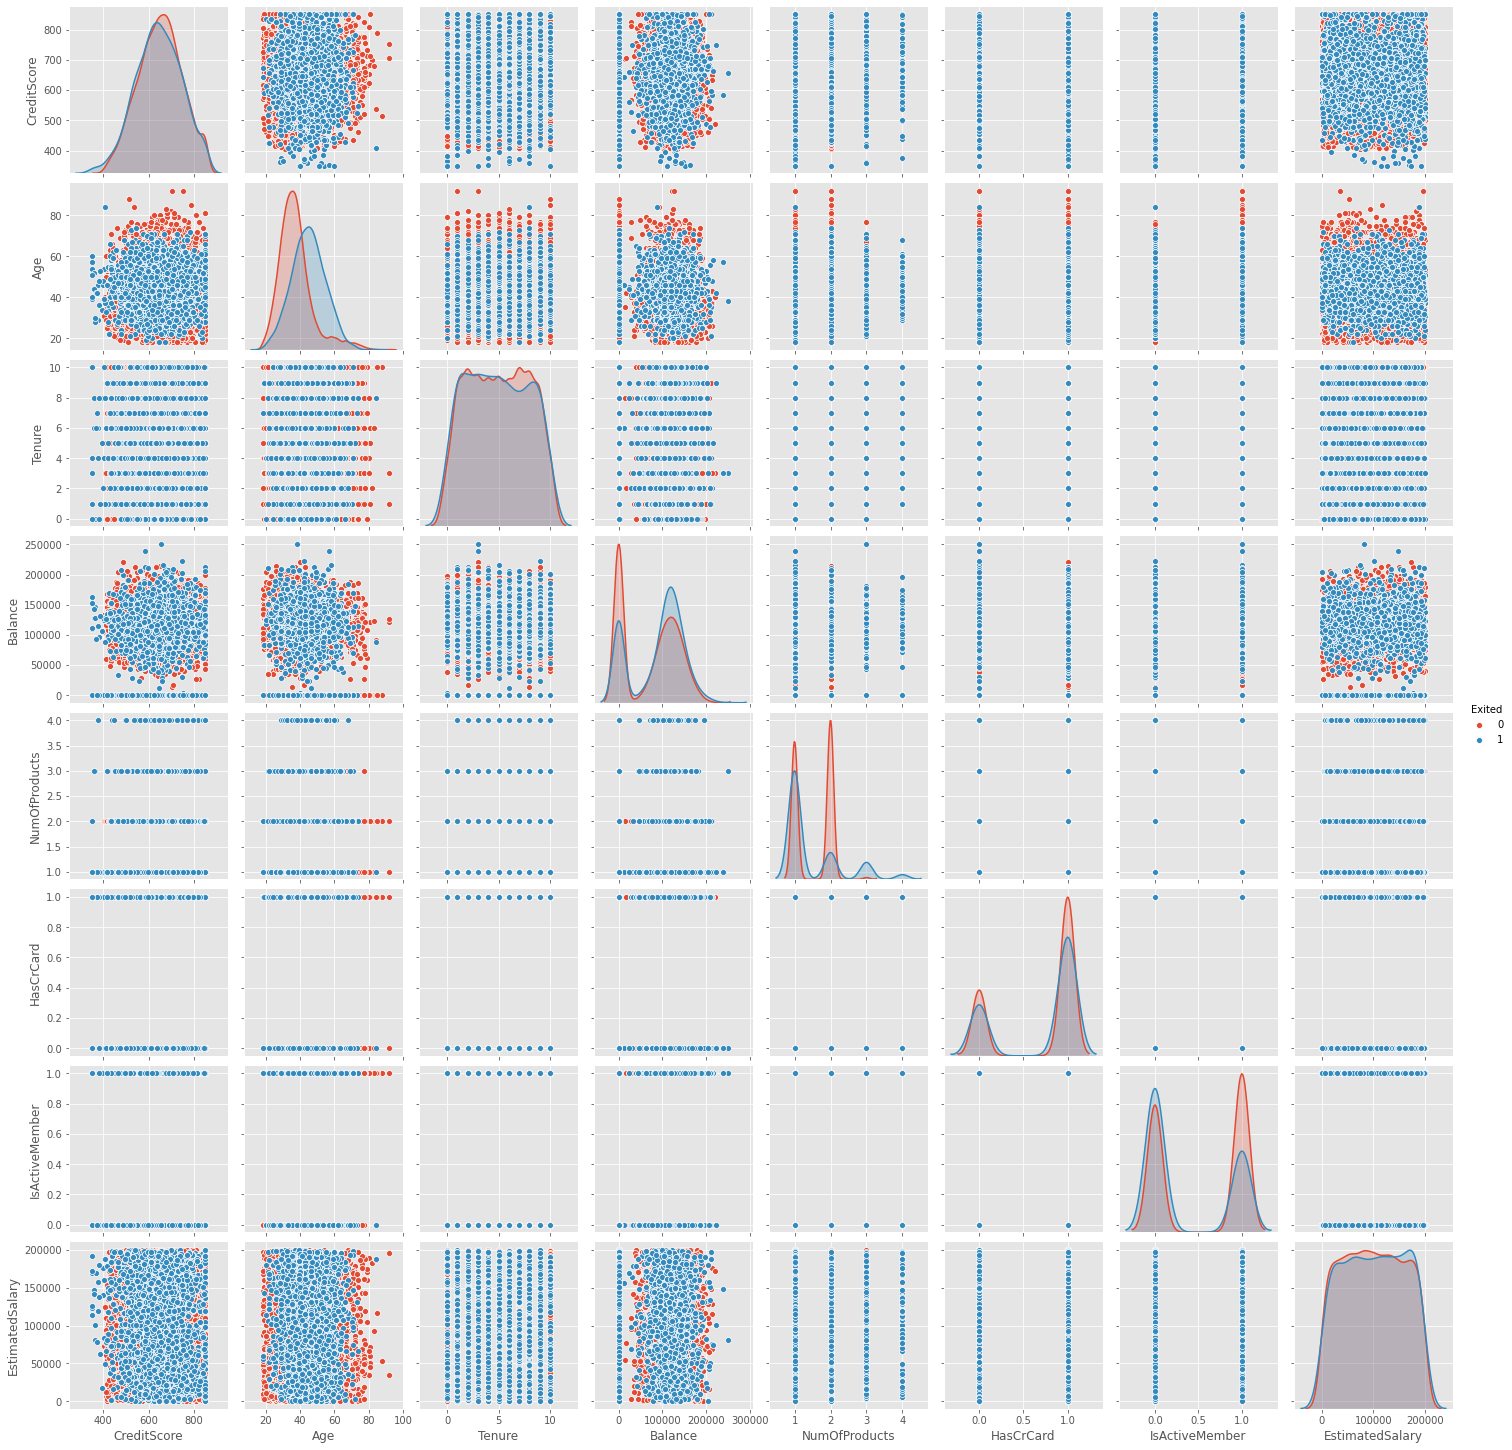

In [ ]:
sns.pairplot(churn, hue='Exited')

In [ ]:
X = churn.loc[:, churn.columns != 'Exited']
y = churn['Exited']

In [ ]:
# separamos el dataset en test y prueba

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size = 0.25, 
                                                    random_state = 15)

### L1(lasso) vs L2(Ridge)

In [ ]:
# aplicaremos el concepto de penalización para los coeficientes, recordemos que por defecto es L2.

# REGULARIZACION L1
lr_L1 = LogisticRegression(penalty='l1', solver='liblinear')

lr_L1.fit(X_train, y_train)


# REGULARIZACION L2
lr_L2 = LogisticRegression(penalty='l2') # podriamos no poner nada... si o no?

lr_L2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

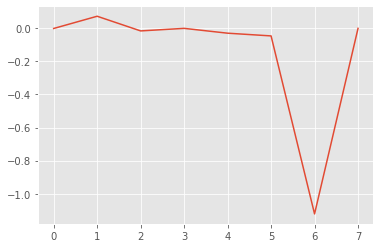

In [ ]:
plt.plot(lr_L1.coef_.flatten())

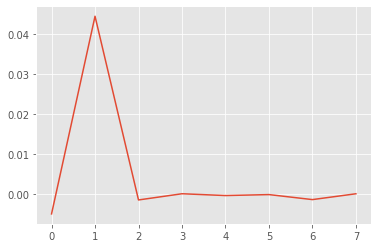

In [ ]:
plt.plot(lr_L2.coef_.flatten())

In [ ]:
print('Penalización L1: \n')
print('El accuracy de prueba es de: {}'.format(lr_L1.score(X_train, y_train)))
print('El accuracy de test es de: {}'.format(lr_L1.score(X_test, y_test)))

Penalización L1: 

El accuracy de prueba es de: 0.8069333333333333
El accuracy de test es de: 0.8096


In [ ]:
print('Penalización L2: \n')
print('El accuracy de prueba es de: {}'.format(lr_L2.score(X_train, y_train)))
print('El accuracy de test es de: {}'.format(lr_L2.score(X_test, y_test)))

Penalización L2: 

El accuracy de prueba es de: 0.7890666666666667
El accuracy de test es de: 0.7924


Ahora interpretemos los datos que nos ofrecen los métodos de predict y predict_proba

In [ ]:
lr_L1.predict(X_test[:1])

array([0])

In [ ]:
lr_L1.predict_proba(X_test[:1])

array([[0.89417551, 0.10582449]])

In [ ]:
# por ultimo vamos a introducir el concepto de Confusion maxtrix visto en la teoria

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, lr_L1.predict(X_test))

array([[1945,   50],
       [ 426,   79]])

In [ ]:
# ahora vamos a ver el reporte de clasificación

print(classification_report(y_test, lr_L1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1995
           1       0.61      0.16      0.25       505

    accuracy                           0.81      2500
   macro avg       0.72      0.57      0.57      2500
weighted avg       0.78      0.81      0.76      2500



# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

cv_score = cross_val_score(lr, X, y, cv=5)

In [ ]:
cv_score

array([0.7915, 0.791 , 0.7935, 0.789 , 0.7885])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Accuracy: 0.79 (+/- 0.00)


Vamos a introducir ahora una buena implementación para poder revisar el efecto de nuestros hiperparametros.

In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'C': [0.01, 0.05, 0.1, 0.5, 1, 2],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression()

clf = GridSearchCV(lr, params)

In [ ]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055646,0.003838,0.002247,0.000078,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.8080,0.8060,0.8060,0.8050,0.8000,0.8050,0.002683,6
1,0.052971,0.003794,0.002199,0.000044,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.7905,0.7905,0.7920,0.7890,0.7860,0.7896,0.002035,7
2,0.096449,0.023376,0.002255,0.000109,0.05,l1,liblinear,"{'C': 0.05, 'penalty': 'l1', 'solver': 'liblin...",0.8075,0.8040,0.8065,0.8140,0.8035,0.8071,0.003760,1
3,0.052145,0.003562,0.002229,0.000023,0.05,l2,liblinear,"{'C': 0.05, 'penalty': 'l2', 'solver': 'liblin...",0.7900,0.7905,0.7920,0.7890,0.7860,0.7895,0.002000,8
4,0.096964,0.017547,0.002209,0.000147,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.8080,0.8015,0.8055,0.8135,0.8040,0.8065,0.004087,4
5,0.052070,0.003738,0.002200,0.000042,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.7900,0.7905,0.7920,0.7890,0.7860,0.7895,0.002000,8
6,0.107413,0.010502,0.002179,0.000117,0.5,l1,liblinear,"{'C': 0.5, 'penalty': 'l1', 'solver': 'libline...",0.8075,0.8010,0.8040,0.8140,0.8035,0.8060,0.004506,5
7,0.053047,0.003827,0.002203,0.000030,0.5,l2,liblinear,"{'C': 0.5, 'penalty': 'l2', 'solver': 'libline...",0.7900,0.7905,0.7920,0.7890,0.7860,0.7895,0.002000,8
8,0.103117,0.009906,0.002231,0.000080,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.8080,0.8010,0.8040,0.8150,0.8045,0.8065,0.004796,3
9,0.052904,0.003416,0.002222,0.000059,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.7900,0.7905,0.7920,0.7890,0.7860,0.7895,0.002000,8
